In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw11.ipynb")

<img style="display: block; margin-left: auto; margin-right: auto" src="./ccsf-logo.png" width="250rem;" alt="The CCSF black and white logo">

# Homework 11: Correlation and Regression

## References
* [The Regression Line](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html)
* [Method of Least Squares](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html)
* [Least Squares Regression](https://www.inferentialthinking.com/chapters/15/4/Least_Squares_Regression.html)
* [`datascience` Documentation](https://datascience.readthedocs.io/)
* [Python Quick Reference](https://ccsf-math-108.github.io/materials-sp24/resources/quick-reference.html)

## Assignment Reminders

- Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- For all tasks indicated with a 🔎 that you must write explanations and sentences for, provide your answer in the designated space.
- Throughout this assignment and all future ones, please be sure to not re-assign variables throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!_
- We encourage you to discuss this assignment with others but make sure to write and submit your own code. Refer to the syllabus to learn more about how to learn cooperatively.
- Unless you are asked otherwise, use the non-interactive visualizations when asked to produce a visualization for a task.
- View the related <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page for additional details.

Run the following code cell to import the tools for this assignment.

In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Linear Regression Setup

When performing linear regression in this course, you will need to compute several important quantities which will be used throughout our analysis. Unless otherwise specified when asked to make a prediction please assume we are predicting $y$ from $x$ throughout this assignment. To help with our later analysis, we will begin by writing some of these functions and understanding what they can do for us.

### Task 01 📍

Define a function `standard_units` that converts a given array to standard units.

**Hint:** You may find the `np.mean` and `np.std` functions helpful.

_Points:_ 2

In [3]:
def standard_units(data):
    return (data - np.mean(data))/np.std(data)

In [4]:
grader.check("task_01")

task_01 results: All test cases passed!
task_01 - 1 message: ✅ standard_units works for the test data we provided.
task_01 - 2 message: ✅ The mean of the standardized test data is 0.
task_01 - 3 message: ✅ The standard deviation of the standardized test data is 1.

### Task 02 📍

Which of the following are true about standard units? Assume we have converted an array of data into standard units using the function above.

1. The unit of all our data when converted into standard units is the same as the unit of the original data.
2. The sum of all our data when converted into standard units is 0.
3. The standard deviation of all our data when converted into standard units is 1.
4. Adding 5 to our original data has no impact on the resultant data when converted to standard units.
5. Multiplying our original data by 5 has no impact on the resultant data when converted to standard units.

Assign `standard_array` to an array of your selections.

_Points:_ 2

In [5]:
standard_array = make_array(2, 3, 4, 5)

In [6]:
grader.check("task_02")

task_02 results: All test cases passed!
task_02 - 1 message: ✅ standard_array contains some of the integers 1, 2, 3, 4, or 5.

### Task 03 📍

Define a function `correlation` that computes the correlation between 2 arrays of data in original units.

**Hint:** Consider using the `standard_units` function you have defined previously.

_Points:_ 2

In [7]:
def correlation(x, y):
    return np.mean(standard_units(x)*standard_units(y))

In [8]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ correlation shows that linear data has a coefficient of 1.

### Task 04 📍

Which of the following are true about the correlation coefficient?

1. The correlation coefficient measures the strength of a linear relationship.
2. When looking at the existing data, a correlation coefficient of 1.0 means an increase in one variable always means an increase in the other variable.
3. The correlation coefficient is the slope of the regression line in standard units.
4. The correlation coefficient stays the same if we swap our x-axis and y-axis.
5. If we add 5 to our original data, our correlation coefficient will increase by 5.

Assign `r_array` to an array of your selections.

_Points:_ 2

In [9]:
r_array = make_array(1, 2, 3, 4)

In [10]:
grader.check("task_04")

task_04 results: All test cases passed!
task_04 - 1 message: ✅ r_array contains some of the integers 1, 2, 3, 4, or 5.

### Task 05 📍

Define a function `slope` that computes the slope of our line of best fit (to predict y given x), given two arrays of data in original units. Assume we want to create a line of best fit in original units.

**Hint:** Consider using the `correlation` function you have defined previously.

_Points:_ 2

In [11]:
def slope(x, y):
    r = correlation(x, y) 
    return r*np.std(y)/np.std(x)

In [12]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: ✅ slope produced the correct result for our test data set.

### Task 06 📍

Which of the following are true statements about the slope of our line of best fit? Assume $x$ refers to the value of one variable that we use to predict the value of y.

1. In original units, the slope has the unit: unit of $x$ / unit of $y$.
2. In standard units, the slope is unitless.
3. In original units, the slope is unchanged by swapping $x$ and $y$.
4. In standard units, a slope of 1 means our data is perfectly linearly correlated.
5. In original units and standard units, the slope always has the same positive or negative sign.
 
Assign `slope_array` to an array of your selections.

_Points:_ 2

In [13]:
slope_array = make_array(2, 4, 5)

In [14]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ slope_array contains some of the integers 1, 2, 3, 4, or 5.

### Task 07 📍

Define a function `intercept` that computes the intercept of our line of best fit (to predict `y` given `x`), given 2 arrays of data in original units. Assume we want to create a line of best fit in original units.

**Hint:** Consider using slope function you have defined previously.

_Points:_ 2

In [15]:
def intercept(x, y):
    return np.mean(y) - slope(x, y) * np.mean(x)

In [16]:
grader.check("task_07")

task_07 results: All test cases passed!
task_07 - 1 message: ✅ intercept produced the correct result for our test data set.

### Task 08 📍

Which of the following are true about the intercept of our line of best fit? Assume $x$ refers to the value of one variable that we use to predict the value of $y$.

1. In original units, the intercept has the same unit as the $y$ values.
2. In original units, the intercept has the same unit as the $x$ values.
3. In original units, the slope and intercept have the same unit.
4. In standard units, the intercept for the regression line is 0.
5. In original units and standard units, the intercept always has the same numerical value.

Assign `intercept_array` to an array of your selections.

_Points:_ 2

In [17]:
intercept_array = make_array(1, 4)

In [18]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: ✅ intercept_array contains some of the integers 1, 2, 3, 4, or 5.

### Task 09 📍

Define a function `predict` that takes in a table and 2 column names, and returns an array of predictions. Keep the following in mind when you make this function:
* The predictions should be created using a fitted regression line.
* We are predicting `y_col` from `x_col`, both in original units.

**Hint 1:** Consider using the `slope` and `intercept` functions you have defined previously.

**Hint 2:** Re-reading [Section 15.2](https://inferentialthinking.com/chapters/15/2/Regression_Line.html) might be helpful here.

**Note:** The public tests are quite comprehensive for this question, so passing them means that your function most likely works correctly.

_Points:_ 3

In [19]:
def predict(tbl, x_col, y_col):
    x = tbl.column(x_col)
    y = tbl.column(y_col)
    return slope(x, y) * x + intercept(x, y)

In [20]:
grader.check("task_09")

task_09 results: All test cases passed!
task_09 - 1 message: ✅ predict returns an array.
task_09 - 2 message: ✅ predict seems to work correctly on the test data we used.
task_09 - 3 message: ✅ predict seems to work correctly on the test data we used.
task_09 - 4 message: ✅ predict seems to work correctly on the test data we used.

## FIFA Predictions

The following data was [scraped](https://en.wikipedia.org/wiki/Data_scraping) from [sofifa.com](https://sofifa.com/), a website dedicated to collecting information from FIFA video games. The dataset consists of all players in [FIFA 22](https://en.wikipedia.org/wiki/FIFA_22) and their corresponding attributes. We have truncated the dataset to a limited number of rows (100) to ease with our visualizations and analysis. 

**Since we're learning about linear regression, we will look specifically for a linear association between various player attributes. To help with understanding where the line of best fit generated in linear regression comes from please do not use the `.fit_line` argument in `.scatter` at any point on question 2 unless the code was provided for you.**

Run the following cell to load the data and reduce the original data to a more manageable amount of information. (There are 110 columns in the original dataset!) 

In [21]:
fifa = Table.read_table('fifa22.csv')
fifa = fifa.select("short_name", "overall", "value_eur", 
                   "wage_eur", "age", "pace", "shooting", 
                   "passing", "attacking_finishing")
fifa.show(5)

short_name,overall,value_eur,wage_eur,age,pace,shooting,passing,attacking_finishing
L. Messi,93,78000000,320000,34,85,92,91,95
R. Lewandowski,92,119500000,270000,32,78,92,79,95
Cristiano Ronaldo,91,45000000,270000,36,87,94,80,95
Neymar Jr,91,129000000,270000,29,91,83,86,83
K. De Bruyne,91,125500000,350000,30,76,86,93,82


### Task 10 📍🔎

<!-- BEGIN QUESTION -->

Before jumping into any statistical techniques, it's important to see what the data looks like, because data visualizations allow us to uncover patterns in our data that would have otherwise been much more difficult to see.

Create a scatter plot with age on the x-axis (`"age"`), and the player's value in Euros (`"value_eur"`) on the y-axis.

_Points:_ 3

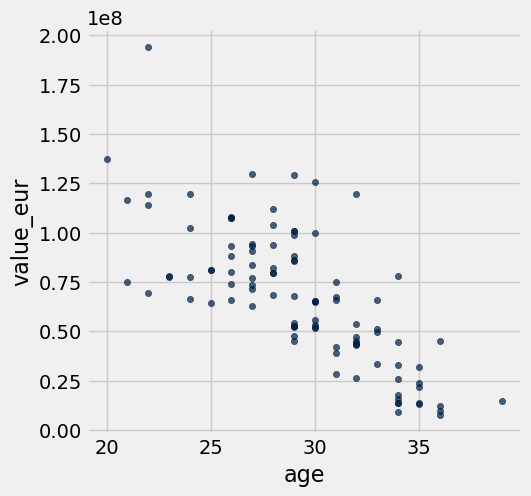

In [22]:
fifa.scatter('age', 'value_eur')

<!-- END QUESTION -->

### Task 11 📍🔎

<!-- BEGIN QUESTION -->

Create a scatter plot with player age (`"age"`) along the x-axis and both real player value (`"value_eur"`) and predicted player value along the y-axis. 

* The predictions should be created using a fitted regression line.
* The color of the dots for the real player values should be different from the color for the predicted player values.

**Hint 1:** Consider using the `predict` function you have defined previously.

**Hint 2:** [Section 15.2](https://inferentialthinking.com/chapters/15/2/Regression_Line.html) and [Section 7.3](https://inferentialthinking.com/chapters/07/3/Overlaid_Graphs.html) have examples of creating such scatter plots.

_Points:_ 3

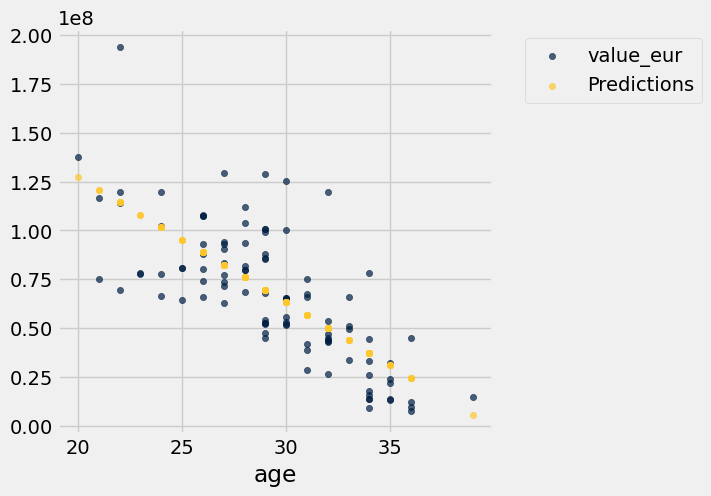

In [23]:
predictions = predict(fifa, 'age', 'value_eur')
fifa_with_predictions = fifa.with_column('Predictions', predictions)
fifa_with_predictions.select('age', 'value_eur', 'Predictions').scatter('age')

<!-- END QUESTION -->

### Task 12 📍🔎

<!-- BEGIN QUESTION -->

Looking at the scatter plot you produced above, is linear regression a good model to use? If so, what features or characteristics make this model reasonable? If not, what features or characteristics make it unreasonable?

_Points:_ 3

It looks reasonable to use a linear regression. However, it has some outliers and some extrapolations, and maybe it can be a slight curve. 

<!-- END QUESTION -->

### Task 13 📍

Define a function `rmse` that takes in two arguments: a slope and an intercept for a potential regression line. The function should return the root mean squared error between the values predicted by a regression line with the given slope and intercept and the actual outcomes.

**Note:** Assume we are still predicting `"value_eur"` from `"age"` in original units from the `fifa` table.

_Points:_ 2

In [24]:
def rmse(slope, intercept):
    predictions = slope * fifa.column('age') + intercept
    errors = predictions - fifa.column('value_eur')
    return np.mean(errors ** 2) ** .5

In [25]:
grader.check("task_13")

task_13 results: All test cases passed!
task_13 - 1 message: ✅ rmse returns a float.
task_13 - 2 message: ✅ rmse seems to work on our test data.

### Task 14 📍🔎

<!-- BEGIN QUESTION -->

1. Use the `rmse` function you defined along with `minimize` to find the least-squares regression parameters predicting player value from player age. Review the [example of using the `minimize` function from the textbook](https://inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#numerical-optimization).
2. Then set `lsq_slope` and `lsq_intercept` to be the least-squares regression line slope and intercept, respectively.
3. Finally, create a scatter plot like you did in Task 11 with player age (`"age"`) along the x-axis and both real player value (`"value_eur"`) and predicted player value along the y-axis. Be sure to use your least-squares regression line to compute the predicted values. The color of the dots for the real player values should be different from the color for the predicted player values.

**Note:** Your solution should **not** make any calls to the slope or intercept functions defined earlier. You are demonstrating a different method for creating the line in this task.

**Hint:** Your call to `minimize` will return an array of argument values that minimize the return value of the function passed to minimize.

_Points:_ 3

Slope: -6.41462e+06 | Intercept: 2.55525e+08


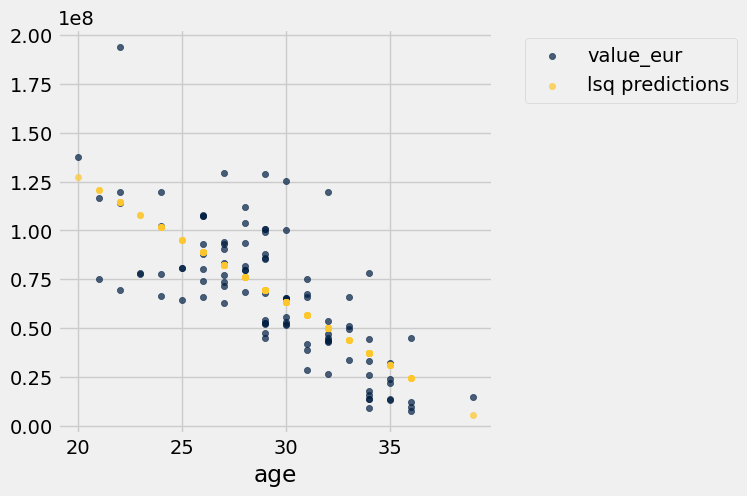

In [26]:
minimized_parameters = minimize(rmse)
lsq_slope = minimized_parameters[0]
lsq_intercept = minimized_parameters[1]

# This just prints your slope and intercept
print("Slope: {:g} | Intercept: {:g}".format(lsq_slope, lsq_intercept))

lsq_predictions = lsq_slope * fifa.column('age') + lsq_intercept
fifa_with_lsq_predictions = fifa_with_predictions = fifa.with_column('lsq predictions', lsq_predictions)
fifa_with_lsq_predictions.select('age', 'value_eur', 'lsq predictions').scatter('age')

<!-- END QUESTION -->

Run this cell to generate a scatter plot for the next part.

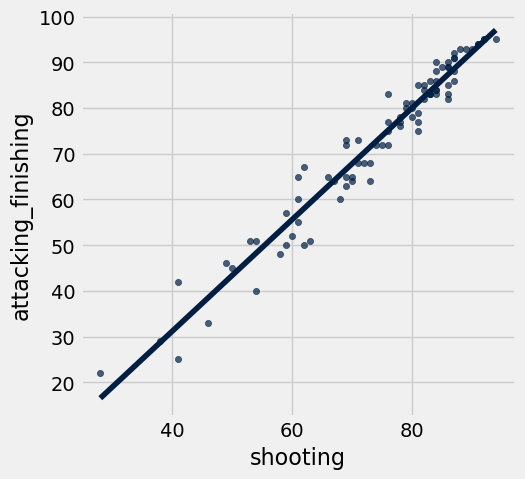

In [27]:
no_goalies = fifa.where("shooting", are.above(0))
no_goalies.scatter('shooting', 'attacking_finishing', fit_line=True)

### Task 15 📍

Above is a scatter plot showing the relationship between a player's shooting ability (`"shooting"`) and their scoring ability (`"attacking_finishing"`). This visual excludes information on goalies. Goalies do not have shooting information in this dataset, but they have scoring ability data, so we've removed the goalies from the `fifa` table when producing the above image.

There is clearly a strong positive correlation between the two variables, and we'd like to predict a player's scoring ability from their shooting ability. 

Which of the following statements are true, assuming linear regression is a reasonable model?

**Hint:** Re-reading [Section 15.2](https://inferentialthinking.com/chapters/15/2/Regression_Line.html) might be helpful here.

1. For a majority of players with a shooting attribute above 80 our model predicts they have a better scoring ability than shooting ability.
2. A randomly selected player's predicted scoring ability in standard units will always be less than their shooting ability in standard units.
3. If we select a player who's shooting ability is 1.0 in standard units, their scoring ability, on average, will be less than 1.0 in standard units.
4. Goalies have `attacking_finishing` scores in our dataset but do not have shooting scores. We can still use our model to predict their attacking_finishing scores.

Assign `scoring_array` to an array of your selections.

_Points:_ 2

In [28]:
scoring_array = make_array(1, 3)

In [29]:
grader.check("task_15")

task_15 results: All test cases passed!
task_15 - 1 message: ✅

## Submit your Homework to Canvas

Once you have finished working on the homework tasks, prepare to submit your work in Canvas by completing the following steps.

1. In the related Canvas Assignment page, check the rubric to know how you will be scored for this assignment.
2. Double-check that you have run the code cell near the end of the notebook that contains the command `"grader.check_all()"`. This command will run all of the run tests on all your responses to the auto-graded tasks marked with 📍.
3. Double-check your responses to the manually graded tasks marked with 📍🔎.
3. Select the menu item "File" and "Save Notebook" in the notebook's Toolbar to save your work and create a specific checkpoint in the notebook's work history.
4. Select the menu items "File", "Download" in the notebook's Toolbar to download the notebook (.ipynb) file. 
5. In the related Canvas Assignment page, click Start Assignment or New Attempt to upload the downloaded .ipynb file.

**Keep in mind that the auto-grader does not always check for correctness. Sometimes it just checks for the format of your answer, so passing the auto-grader for a task does not mean you got the answer correct for that task.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [30]:
grader.check_all()

task_01 results: All test cases passed!
task_01 - 1 message: ✅ standard_units works for the test data we provided.
task_01 - 2 message: ✅ The mean of the standardized test data is 0.
task_01 - 3 message: ✅ The standard deviation of the standardized test data is 1.

task_02 results: All test cases passed!
task_02 - 1 message: ✅ standard_array contains some of the integers 1, 2, 3, 4, or 5.

task_03 results: All test cases passed!
task_03 - 1 message: ✅ correlation shows that linear data has a coefficient of 1.

task_04 results: All test cases passed!
task_04 - 1 message: ✅ r_array contains some of the integers 1, 2, 3, 4, or 5.

task_05 results: All test cases passed!
task_05 - 1 message: ✅ slope produced the correct result for our test data set.

task_06 results: All test cases passed!
task_06 - 1 message: ✅ slope_array contains some of the integers 1, 2, 3, 4, or 5.

task_07 results: All test cases passed!
task_07 - 1 message: ✅ intercept produced the correct result for our test data 